In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
file_path = "UCS-Satellite-Database-1-1-2023.xlsx"
data = pd.read_excel(file_path)
print(data.shape)
data['Inclination (degrees)'] = pd.to_numeric(data['Inclination (degrees)'], errors='coerce')
features = data[['Longitude of GEO (degrees)', 'Perigee (km)', 'Apogee (km)', 'Eccentricity', 'Inclination (degrees)']]
features = features.dropna()
features = features.reset_index()
print(features.head())

(6718, 68)
   index  Longitude of GEO (degrees)  Perigee (km)  Apogee (km)  Eccentricity  \
0      0                         0.0           566          576      0.001510   
1      1                         0.0           497          517      0.001450   
2      2                         0.0           442          687      0.001510   
3      3                        75.0         35778        35793      0.000178   
4      4                       -75.0         35700        35700      0.000000   

   Inclination (degrees)  
0                  36.90  
1                  97.45  
2                  98.20  
3                   0.08  
4                   0.00  


In [3]:

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

silhouette_scores = []
cluster_range = range(2, 11)  

for n_clusters in cluster_range:
    model = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', affinity='euclidean')
    cluster_labels = model.fit_predict(scaled_features)
    silhouette_avg = silhouette_score(scaled_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)


optimal_num_clusters = cluster_range[silhouette_scores.index(max(silhouette_scores))]


best_model = AgglomerativeClustering(n_clusters=optimal_num_clusters, linkage='ward', affinity='euclidean')
cluster_labels = best_model.fit_predict(scaled_features)

features['Cluster'] = cluster_labels
cluster_counts = dict(pd.Series(cluster_labels).value_counts())

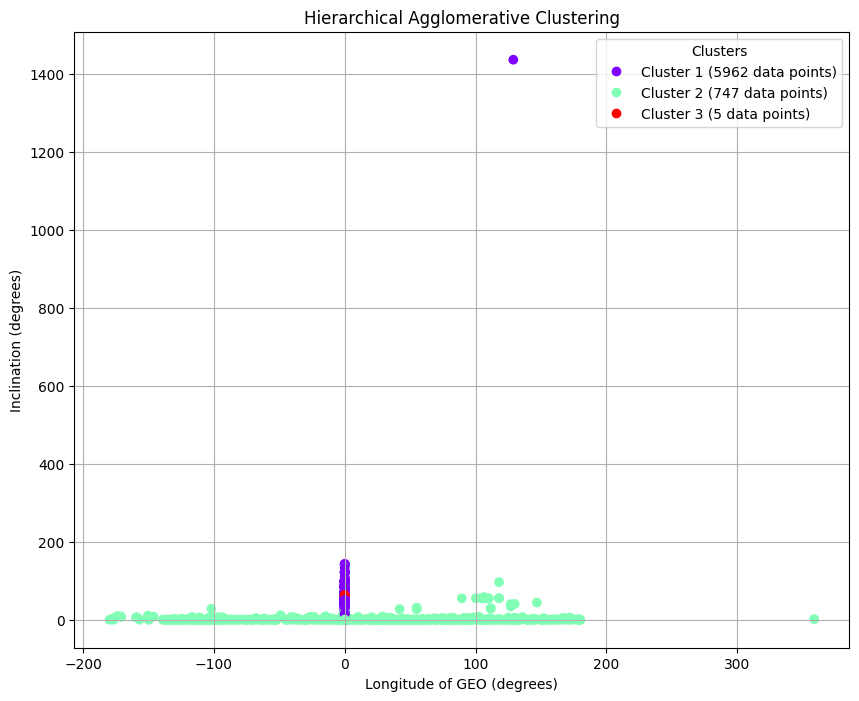

In [4]:
plt.figure(figsize=(10, 8))
scatter = plt.scatter(features['Longitude of GEO (degrees)'], features['Inclination (degrees)'], c=cluster_labels, cmap='rainbow', label='Clusters')
plt.title('Hierarchical Agglomerative Clustering')
plt.xlabel('Longitude of GEO (degrees)')
plt.ylabel('Inclination (degrees)')


legend_labels = [f'Cluster {i+1} ({cluster_counts[i]} data points)' for i in range(optimal_num_clusters)]
legend = plt.legend(handles=scatter.legend_elements()[0], title='Clusters', labels=legend_labels)

plt.grid(True)

plt.show()


In [5]:
print(features.head())

   index  Longitude of GEO (degrees)  Perigee (km)  Apogee (km)  Eccentricity  \
0      0                         0.0           566          576      0.001510   
1      1                         0.0           497          517      0.001450   
2      2                         0.0           442          687      0.001510   
3      3                        75.0         35778        35793      0.000178   
4      4                       -75.0         35700        35700      0.000000   

   Inclination (degrees)  Cluster  
0                  36.90        0  
1                  97.45        0  
2                  98.20        0  
3                   0.08        1  
4                   0.00        1  


In [6]:
import joblib

model_filename = "agglomerative_clustering_model.pkl"
joblib.dump(best_model, model_filename)
print(f"Model saved to {model_filename}")

Model saved to agglomerative_clustering_model.pkl
